<a href="https://colab.research.google.com/github/jansoe/AICA/blob/main/HuggingFaceMiniIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks with Hugging Face

## Setup

#### Installing necessary libraries

With a "!" we can execute terminal commands. Here we execute pip, a package installer for Python, and install the packages we need

In [ ]:
!pip install transformers datasets diffusers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.2 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.21.2-py3-no

#### checking GPU

In [ ]:
!nvidia-smi

Sun Sep 24 09:35:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#### Imports

In [ ]:
import torch
import transformers
import datasets

from PIL import Image

import matplotlib.pyplot as plt

In [ ]:
transformers.__version__

'4.33.2'

## Huggingface Pipelines
The highest level API in Hugging Face are `pipelines`. Basically `pipelines` take the raw data, do some preprocessing, run the preprocessed data through the neural network and than finally apply necessary post-processing.   

In [ ]:
[s for s in dir(transformers.pipelines) if s.endswith('Pipeline')]

['AudioClassificationPipeline',
 'AutomaticSpeechRecognitionPipeline',
 'ConversationalPipeline',
 'DepthEstimationPipeline',
 'DocumentQuestionAnsweringPipeline',
 'FeatureExtractionPipeline',
 'FillMaskPipeline',
 'ImageClassificationPipeline',
 'ImageSegmentationPipeline',
 'ImageToTextPipeline',
 'MaskGenerationPipeline',
 'NerPipeline',
 'ObjectDetectionPipeline',
 'Pipeline',
 'QuestionAnsweringPipeline',
 'SummarizationPipeline',
 'TableQuestionAnsweringPipeline',
 'Text2TextGenerationPipeline',
 'TextClassificationPipeline',
 'TextGenerationPipeline',
 'TextToAudioPipeline',
 'TokenClassificationPipeline',
 'TranslationPipeline',
 'VideoClassificationPipeline',
 'VisualQuestionAnsweringPipeline',
 'ZeroShotAudioClassificationPipeline',
 'ZeroShotClassificationPipeline',
 'ZeroShotImageClassificationPipeline',
 'ZeroShotObjectDetectionPipeline']

### Image classification pipeline

In [ ]:
pipe = transformers.pipeline(
    task = 'image-classification',
    #model = "microsoft/beit-base-patch16-224-pt22k-ft22k",
)

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


we can inspect the model config to see the labels which will be predicted

In [ ]:
pipe.model.config.label2id

{'Afghan hound, Afghan': 160,
 'African chameleon, Chamaeleo chamaeleon': 47,
 'African crocodile, Nile crocodile, Crocodylus niloticus': 49,
 'African elephant, Loxodonta africana': 386,
 'African grey, African gray, Psittacus erithacus': 87,
 'African hunting dog, hyena dog, Cape hunting dog, Lycaon pictus': 275,
 'Airedale, Airedale terrier': 191,
 'American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier': 180,
 'American alligator, Alligator mississipiensis': 50,
 'American black bear, black bear, Ursus americanus, Euarctos americanus': 295,
 'American chameleon, anole, Anolis carolinensis': 40,
 'American coot, marsh hen, mud hen, water hen, Fulica americana': 137,
 'American egret, great white heron, Egretta albus': 132,
 'American lobster, Northern lobster, Maine lobster, Homarus americanus': 122,
 'Angora, Angora rabbit': 332,
 'Appenzeller': 240,
 'Arabian camel, dromedary, Camelus dromedarius': 354,
 'Arctic fox, white fox, Alopex la

now, let's load some image

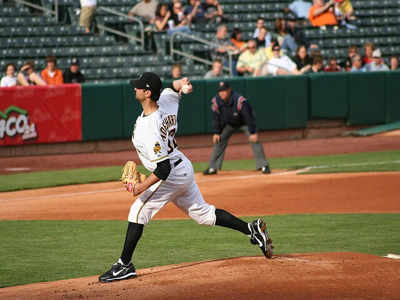

In [ ]:
im = Image.open('drive/MyDrive/Projekte/AktuelleThemen/baseball.png')
im.resize([400, 300])

In [ ]:
%%time
pipe.predict(im)

CPU times: user 582 ms, sys: 1.05 ms, total: 583 ms
Wall time: 583 ms


[{'score': 0.8953168988227844, 'label': 'ballplayer, baseball player'},
 {'score': 0.1007319837808609, 'label': 'baseball'},
 {'score': 0.0007668767939321697, 'label': 'scoreboard'},
 {'score': 6.504852353828028e-05, 'label': 'knee pad'},
 {'score': 4.7943973186193034e-05, 'label': 'pole'}]

In [ ]:
pipe.device

device(type='cpu')

In [ ]:
pipe = transformers.pipeline(
    task = 'image-classification',
    #model = "microsoft/beit-base-patch16-224-pt22k-ft22k",
    device = 0
)

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
%%time
pipe.predict(im)

CPU times: user 36.1 ms, sys: 884 µs, total: 36.9 ms
Wall time: 40.5 ms


[{'score': 0.895316481590271, 'label': 'ballplayer, baseball player'},
 {'score': 0.10073232650756836, 'label': 'baseball'},
 {'score': 0.0007668772013857961, 'label': 'scoreboard'},
 {'score': 6.504831253550947e-05, 'label': 'knee pad'},
 {'score': 4.794381311512552e-05, 'label': 'pole'}]

#### Task 1
Search for some models on Hugging Face and try them out.
* How many labels do they have?
* What are the labels?
* How long does the prediction take?

### Pipeline components

#### Preprocess

In [ ]:
im_prepro = pipe.preprocess(im)
im_prepro

{'pixel_values': tensor([[[[-0.3176, -0.5608, -0.8510,  ..., -0.4588, -0.3490, -0.1922],
          [-0.4196, -0.5843, -0.7961,  ..., -0.4275, -0.2549, -0.0275],
          [-0.5137, -0.6000, -0.7255,  ..., -0.4745, -0.3569, -0.2078],
          ...,
          [ 0.2549,  0.2627,  0.2549,  ...,  0.0510,  0.0588,  0.0745],
          [ 0.2314,  0.2000,  0.2078,  ...,  0.0353,  0.0039,  0.0353],
          [ 0.1529,  0.1608,  0.1922,  ..., -0.0510, -0.0667, -0.0667]],

         [[-0.2784, -0.5529, -0.8118,  ..., -0.3412, -0.2627, -0.0824],
          [-0.3255, -0.5686, -0.7725,  ..., -0.3490, -0.2235,  0.0196],
          [-0.3882, -0.5686, -0.6941,  ..., -0.3804, -0.3020, -0.1294],
          ...,
          [-0.2392, -0.2314, -0.2314,  ..., -0.4824, -0.4824, -0.4667],
          [-0.2314, -0.2549, -0.2471,  ..., -0.4824, -0.4980, -0.4824],
          [-0.2863, -0.2706, -0.2392,  ..., -0.5451, -0.5451, -0.5608]],

         [[-0.2627, -0.5137, -0.8275,  ..., -0.3255, -0.2314, -0.0745],
          [-0

#### Predict

In [ ]:
#_ = pipe.model.to('cpu')

In [ ]:
prediction = pipe.model(**im_prepro)
prediction.logits

tensor([[ 1.8043e-01,  2.0766e-01, -4.0500e-01, -8.7901e-01, -5.6895e-02,
         -2.0622e-02, -8.6252e-01,  6.5998e-01,  4.8058e-01, -5.8888e-01,
          4.4927e-01, -7.5193e-01, -4.9158e-01, -1.4835e-01, -9.5996e-01,
          2.9540e-01,  6.2046e-01, -1.1270e-01,  2.6148e-01,  1.8966e-01,
          3.6480e-01,  1.1073e+00,  1.4084e-01, -4.5319e-02,  2.9694e-01,
         -1.3284e+00, -6.5240e-01, -6.3638e-01, -7.3410e-01, -6.8497e-01,
         -1.0820e+00, -8.7392e-01, -8.2376e-01,  6.4231e-02, -1.3753e-01,
          2.2743e-01,  4.2576e-02, -9.3920e-01,  1.9484e-01, -5.8905e-01,
         -1.5335e-01, -1.0229e+00,  1.5900e-02, -1.2291e-01, -1.6184e+00,
         -3.6703e-01, -1.0373e+00, -5.0273e-01, -4.8018e-01, -1.2988e+00,
         -1.2103e+00,  2.8627e-02,  9.1228e-02, -1.1788e-01, -6.2520e-01,
         -1.0950e+00, -7.3800e-01, -7.7160e-01, -3.2787e-01, -4.9150e-01,
          7.9529e-01, -5.0949e-01, -4.9448e-02,  9.3921e-01, -7.4038e-01,
         -3.4025e-01,  8.8548e-03, -7.

In [ ]:
type(prediction), type(prediction.logits), prediction.logits.shape

(transformers.modeling_outputs.ImageClassifierOutput,
 torch.Tensor,
 torch.Size([1, 1000]))

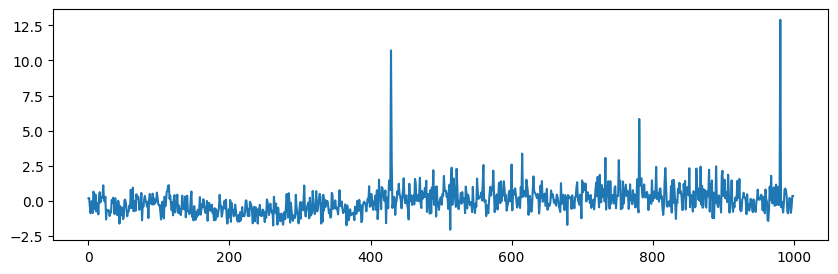

In [ ]:
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(prediction.logits.detach().squeeze())

What is up with the `detach()`? And whats up with `squeeze()`?

In [ ]:
prediction.logits

tensor([[ 1.8043e-01,  2.0766e-01, -4.0500e-01, -8.7901e-01, -5.6895e-02,
         -2.0622e-02, -8.6252e-01,  6.5998e-01,  4.8058e-01, -5.8888e-01,
          4.4927e-01, -7.5193e-01, -4.9158e-01, -1.4835e-01, -9.5996e-01,
          2.9540e-01,  6.2046e-01, -1.1270e-01,  2.6148e-01,  1.8966e-01,
          3.6480e-01,  1.1073e+00,  1.4084e-01, -4.5319e-02,  2.9694e-01,
         -1.3284e+00, -6.5240e-01, -6.3638e-01, -7.3410e-01, -6.8497e-01,
         -1.0820e+00, -8.7392e-01, -8.2376e-01,  6.4231e-02, -1.3753e-01,
          2.2743e-01,  4.2576e-02, -9.3920e-01,  1.9484e-01, -5.8905e-01,
         -1.5335e-01, -1.0229e+00,  1.5900e-02, -1.2291e-01, -1.6184e+00,
         -3.6703e-01, -1.0373e+00, -5.0273e-01, -4.8018e-01, -1.2988e+00,
         -1.2103e+00,  2.8627e-02,  9.1228e-02, -1.1788e-01, -6.2520e-01,
         -1.0950e+00, -7.3800e-01, -7.7160e-01, -3.2787e-01, -4.9150e-01,
          7.9529e-01, -5.0949e-01, -4.9448e-02,  9.3921e-01, -7.4038e-01,
         -3.4025e-01,  8.8548e-03, -7.

#### Postprocess

In [ ]:
pipe.postprocess(prediction)

[{'score': 0.8953168988227844, 'label': 'ballplayer, baseball player'},
 {'score': 0.1007319837808609, 'label': 'baseball'},
 {'score': 0.0007668767939321697, 'label': 'scoreboard'},
 {'score': 6.504852353828028e-05, 'label': 'knee pad'},
 {'score': 4.7943973186193034e-05, 'label': 'pole'}]

## And now without a pipe

In [ ]:
model_name = "google/vit-base-patch16-224"

First we need to convert our input data to a generic format

In [ ]:
print(f'Before: tpye {type(im)}, size: {im.size}')
im2 = im.convert("RGB")
print(f'After: tpye {type(im2)}, size: {im2.size}')

Before: tpye <class 'PIL.PngImagePlugin.PngImageFile'>, size: (640, 427)
After: tpye <class 'PIL.Image.Image'>, size: (640, 427)


Then we create the features for the neural net.

A `FeatureExtractor` is in charge of pre-processing audio and vision data. For text data you use a `Tokenizer` and for multimodal models you use a `Processor` (for more info see [here](https://huggingface.co/docs/transformers/preprocessing))

In [ ]:
pre_processor = transformers.AutoFeatureExtractor.from_pretrained(model_name)
pre_processor

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


ViTFeatureExtractor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [ ]:
im_prepared = pre_processor(images=im2, return_tensors="pt")
print(f"""
  type(im_prepared): {type(im_prepared)},
  type(im_prepared.pixel_values): {type(im_prepared.pixel_values)}
""")


  type(im_prepared): <class 'transformers.image_processing_utils.BatchFeature'>, 
  type(im_prepared.pixel_values): <class 'torch.Tensor'>



Let's get the neural network ...

In [ ]:
model = transformers.AutoModelForImageClassification.from_pretrained(model_name)

... and make a prediction

In [ ]:
prediction = model(**im_prepared)

In [ ]:
logits = prediction.logits.detach().squeeze()

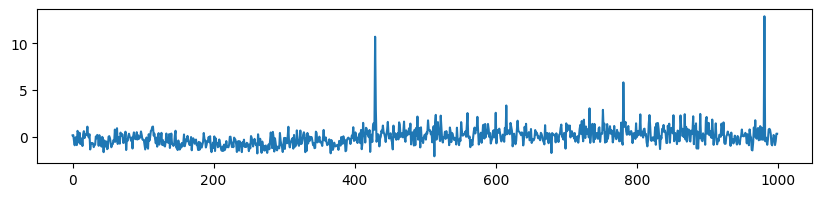

In [ ]:
fig, ax = plt.subplots(figsize=(10,2))
ax = plt.plot(logits)

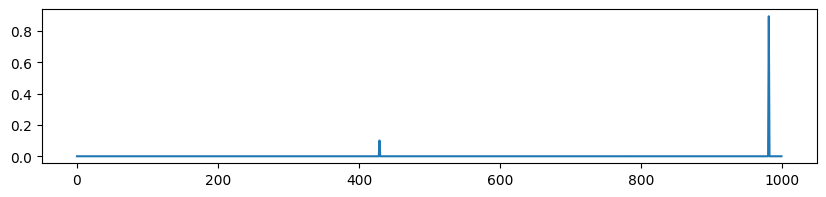

In [ ]:
# convert raw network outputs to exclusive classificaton probabilities
probabilities = torch.nn.functional.softmax(logits, dim=0)

fig, ax = plt.subplots(figsize=(10,2))
ax = plt.plot(probabilities)

In [ ]:
sorted_idx = probabilities.argsort(descending=True)

In [ ]:
[(model.config.id2label[i], probabilities[i]) for i in sorted_idx[:5].numpy()]

[('ballplayer, baseball player', tensor(0.8953)),
 ('baseball', tensor(0.1007)),
 ('scoreboard', tensor(0.0008)),
 ('knee pad', tensor(6.5049e-05)),
 ('pole', tensor(4.7944e-05))]

# More Pipelines: Multimodal

## Visual Question Answering

VQA requires models to read and reason about text in images to answer questions about them.

In [ ]:
vqa_pipe = transformers.pipeline(
    task = 'visual-question-answering'
)

No model was supplied, defaulted to dandelin/vilt-b32-finetuned-vqa and revision 4355f59 (https://huggingface.co/dandelin/vilt-b32-finetuned-vqa).
Using a pipeline without specifying a model name and revision in production is not recommended.


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


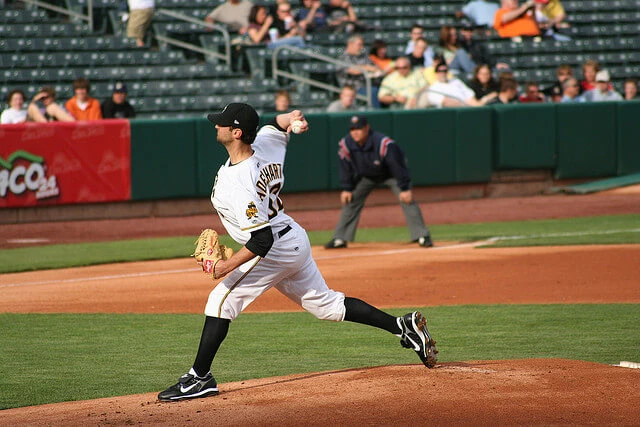

In [ ]:
im

In [ ]:
question = 'which advertisment is in the picture?'
vqa_pipe(im, question)

[{'score': 0.13729220628738403, 'answer': 'budweiser'},
 {'score': 0.10263414680957794, 'answer': 'coca cola'},
 {'score': 0.04029877111315727, 'answer': 'bank of america'},
 {'score': 0.0315106138586998, 'answer': 'toyota'},
 {'score': 0.021921943873167038, 'answer': 'coke'}]

In [ ]:
question = 'is the person in front wearing gloves?'
vqa_pipe(im, question)

[{'score': 0.9254652857780457, 'answer': 'yes'},
 {'score': 0.27549535036087036, 'answer': 'no'},
 {'score': 0.0005343815428204834, 'answer': 'unknown'},
 {'score': 0.00048703563516028225, 'answer': 'baseball'},
 {'score': 0.0004832307458855212, 'answer': 'pitcher'}]

In [ ]:
question = 'what is the person in the background wearing gloves?'
vqa_pipe(im, question)

[{'score': 0.1878471076488495, 'answer': 'catcher'},
 {'score': 0.1452377885580063, 'answer': 'yes'},
 {'score': 0.07974974066019058, 'answer': 'umpire'},
 {'score': 0.050074219703674316, 'answer': 'pitcher'},
 {'score': 0.04022511839866638, 'answer': 'no'}]

In [ ]:
question = 'what is the role of the person in front?'
vqa_pipe(im, question)

[{'score': 0.869023859500885, 'answer': 'pitcher'},
 {'score': 0.06409432739019394, 'answer': 'coach'},
 {'score': 0.017864760011434555, 'answer': 'baseball player'},
 {'score': 0.016678014770150185, 'answer': 'umpire'},
 {'score': 0.01580330729484558, 'answer': 'batter'}]

## Text-2-Image (Diffusion)

In [ ]:
import diffusers

In [ ]:
pipeline_text2image = diffusers.AutoPipelineForText2Image.from_pretrained(
    "stabilityai/stable-diffusion-2-base", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
).to("cuda")

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

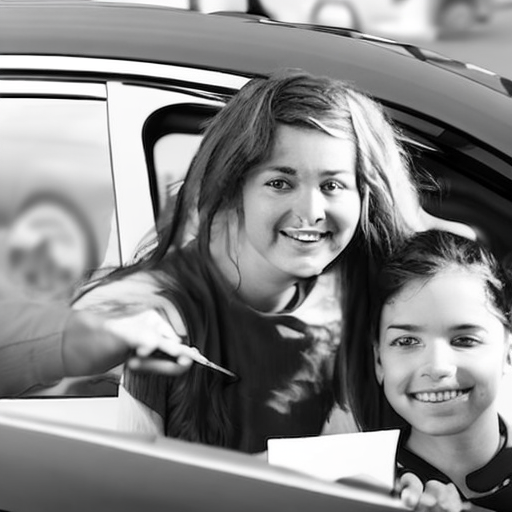

In [ ]:
#prompt = "Studying where others go for vacation, without text in the image" #, cold color palette, muted colors, detailed"

prompt = "Car instructor with student inside a car. Fahrschule sign on top of car. Drawing in black and white"
image = pipeline_text2image(prompt=prompt).images[0]
image

## Bonus: Recording with colab

In [ ]:
!pip install git+https://github.com/jansoe/colab_utils.git

  Cloning https://github.com/jansoe/colab_utils.git to /tmp/pip-req-build-4wrr2c4x
  Running command git clone --filter=blob:none --quiet https://github.com/jansoe/colab_utils.git /tmp/pip-req-build-4wrr2c4x
  Resolved https://github.com/jansoe/colab_utils.git to commit be8136f1c8c3494402a9530d23577deb74bfd631
  Preparing metadata (setup.py) ... done


In [ ]:
from colab_utils import getAudio, webcam2numpy

In [ ]:
raw_audio = getAudio()

In [ ]:
im = webcam2numpy()

In [ ]:
im.shape

(600, 800, 3)